<a href="https://colab.research.google.com/github/mohamedtamer82/bank-customer-churn-prediction/blob/main/Bank_Customer_Churn_Prediction_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading Dataset

In [267]:
bank=pd.read_csv('/content/Churn_Modelling (2).csv')

Data Preprocessing

In [268]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [269]:
bank = bank.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)


In [270]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [271]:
x=bank.iloc[: ,:-1].values
y=bank.iloc[: , -1].values

Encoding dependent variable(Male or Female)

In [272]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:, 2] = le.fit_transform(x[:,2])

In [273]:
print(x[:5])

[[619 'France' 0 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 0 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 0 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 0 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 0 43 2 125510.82 1 1 1 79084.1]]


Encoding Independent variable(Geography)


In [274]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [275]:
print(x[:5])

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]]


Splitting the dataset into the Training set and Test set


In [276]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

Feature Scaling

In [277]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:, [3, 5, 7,11]] = sc.fit_transform(x_train[:, [3, 5, 7,11]])
x_test[:, [3, 5, 7,11]] = sc.transform(x_test[:, [3, 5, 7,11]])

In [278]:
print(x_train)

[[0.0 0.0 1.0 ... 1 1 -1.5052155351703405]
 [1.0 0.0 0.0 ... 1 0 1.6146554924308967]
 [0.0 0.0 1.0 ... 1 1 -0.4050782376658705]
 ...
 [0.0 0.0 1.0 ... 1 0 -1.0505032188637402]
 [1.0 0.0 0.0 ... 0 1 0.33857072000738525]
 [1.0 0.0 0.0 ... 0 0 -0.030473094975818883]]


Synthetic Minority Over-sampling Technique(SMOTE)

In [279]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)


Training the Random Forest Classification model on the Training set

In [280]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
classifier.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=0)

Model Evaluation

In [281]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
threshold = 0.3
y_pred_adjusted = (y_pred_proba > threshold).astype(int)


In [282]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred_adjusted.reshape(len(y_pred_adjusted),1), y_test.reshape(len(y_test),1)),1))



[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


Making Confusion Matrix

In [283]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_adjusted)
print(cm)
accuracy_score(y_test, y_pred_adjusted)

[[1300  293]
 [ 124  283]]


0.7915

Making Classification Report

In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.70      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



✅ 1. Confusion Matrix (with seaborn heatmap)


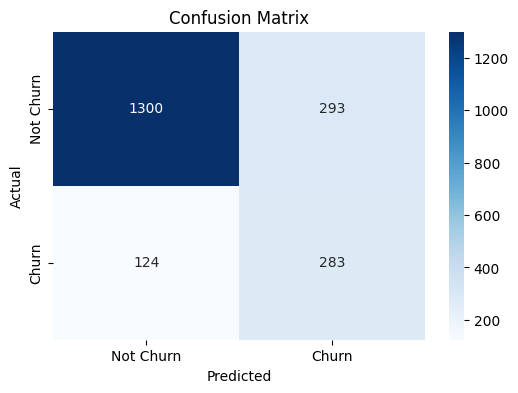

In [285]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 ROC Curve

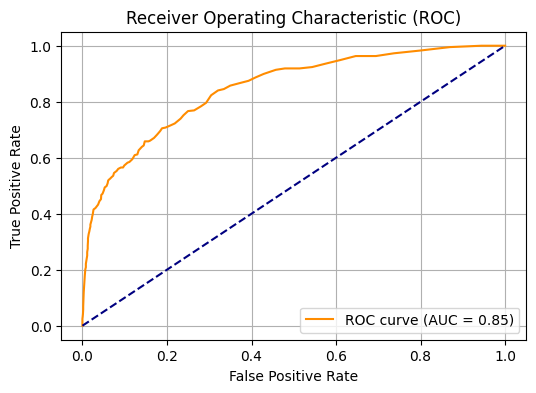

In [286]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Precision-Recall Curve

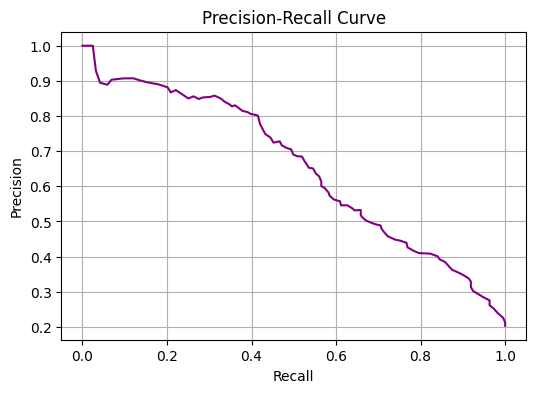

In [287]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


✅ 4. Histogram of Predicted Probabilities


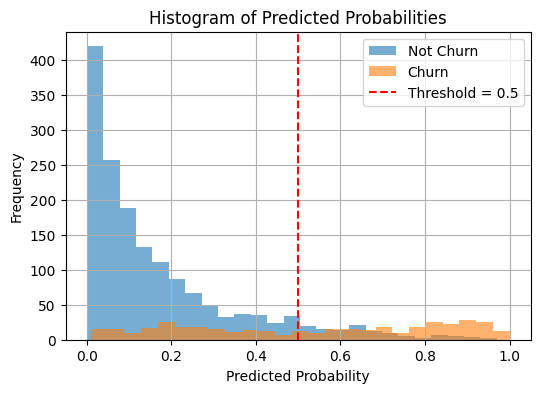

In [288]:
plt.figure(figsize=(6,4))
plt.hist(y_pred_proba[y_test == 0], bins=25, alpha=0.6, label='Not Churn')
plt.hist(y_pred_proba[y_test == 1], bins=25, alpha=0.6, label='Churn')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.grid()
plt.show()
